In [4]:
!pip install rembg pillow scikit-learn opencv-python matplotlib onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.3 MB/s eta 0:00:00


In [46]:
from google.colab import files

uploaded = files.upload()

# Get the uploaded filename
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)


Saving Screenshot 2025-11-19 at 9.34.15 PM.png to Screenshot 2025-11-19 at 9.34.15 PM (1).png
Uploaded: Screenshot 2025-11-19 at 9.34.15 PM (1).png


Background removed → clean_Screenshot 2025-11-19 at 9.34.15 PM (1).png


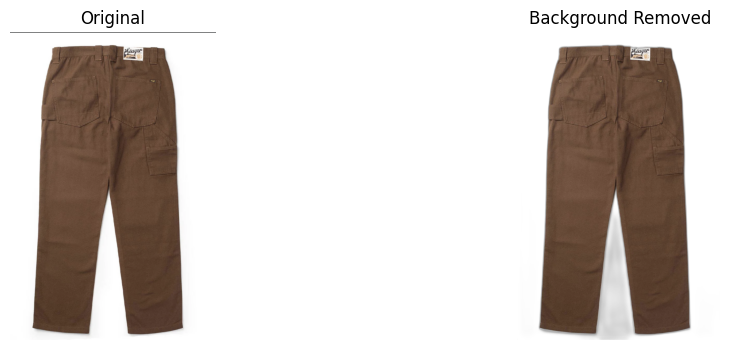

In [47]:
from rembg import remove
from PIL import Image
import io

clean_filename = "clean_" + filename

with open(filename, 'rb') as i:
    input_img = i.read()

output_img = remove(input_img)

with open(clean_filename, 'wb') as o:
    o.write(output_img)

print("Background removed →", clean_filename)

# Display images
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(Image.open(filename))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(Image.open(clean_filename))
plt.title("Background Removed")
plt.axis("off")

plt.show()


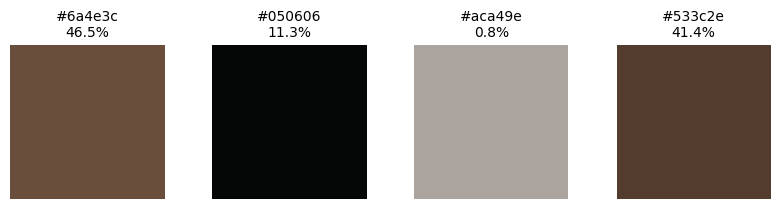

In [50]:
def extract_colors_with_percentage(image_path, k=4):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize((200, 200))
    arr = np.array(img)

    mask = arr[:, :, 3] > 0
    arr = arr[mask][:, :3]

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(arr)
    colors = kmeans.cluster_centers_.astype(int)

    total_pixels = len(labels)
    percentages = [(np.sum(labels == i) / total_pixels) * 100 for i in range(k)]

    return [(tuple(colors[i]), percentages[i]) for i in range(k)]

def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])

colors_percent = extract_colors_with_percentage(clean_filename, k=4)

plt.figure(figsize=(10,2))
for i, (rgb, pct) in enumerate(colors_percent):
    hex_code = rgb_to_hex(rgb)

    plt.subplot(1, len(colors_percent), i+1)

    plt.imshow(np.ones((100,100,3), dtype=np.uint8) * np.array(rgb))

    plt.title(f'{hex_code}\n{pct:.1f}%', fontsize=10)
    plt.axis("off")

plt.show()

# FOR TOP 2 COLORS

# colors_percent_sorted = sorted(colors_percent, key=lambda x: x[1], reverse=True)
# top2_colors = colors_percent_sorted[:2]

# plt.figure(figsize=(5,2))
# for i, (rgb, pct) in enumerate(top2_colors):
#     hex_code = rgb_to_hex(rgb)

#     plt.subplot(1, 2, i+1)
#     plt.imshow(np.ones((100,100,3), dtype=np.uint8) * np.array(rgb))
#     plt.title(f'{hex_code}\n{pct:.1f}%', fontsize=10)
#     plt.axis("off")

# plt.show()
